# Stock Price Dynamics

Modeling stock price dynamics is an important aspect of mathematical finance. Simulating stock price movements allows an algorithmic trader to test different strategies. Policy makers at the federal reserve can evaluate risk and volatility using similar models.

It's important to keep in mind that every financial model contains assumptions and limitations. Understanding these limitations is a crucial part of being a responsible practicioner. At any rate, stochastic models are still a valuable tool for assessing risk and volatility.

## Geometric Brownian Motion

Simulations of stocks and options are often modeled using stochastic differential equations (SDEs). Because of the randomness associated with stock price movements, the models cannot be developed using ordinary differential equations (ODEs).

The usual model for the time-evolution of an asset price $S$ is given by the Geometric Brownian Motion, represented by the following stochastic differential equation:

$$dS = \mu S dt + \sigma S dW_t$$

where $S$ is the stock price, $\mu$ is the drift coefficient, $\sigma$ is the diffusion coefficient (or volatility), and $W_t$ is the [Brownian Motion](https://en.wikipedia.org/wiki/Brownian_motion).

In modeling a stock price, the drift coefficient represents the mean of returns over some period of time, and the diffusion coefficient represents the standard deviation of those same returns.

The Brownian Motion $W_t$ is the random portion of the equation. Each Brownian Increment $W_i$ is computed by multiplying a standard random variable $z_i$ from a normal distribution $N(0,1)$ with mean $0$ and standard deviation $1$ by the square root of the time increment $\sqrt{\Delta t_i}$.

$$W_i = z_i \sqrt{\Delta t_i}$$

The cumulative sum of the Brownian increments is the discretized Brownian path.

$$W_{n}(t) = \sum_{i = 1}^n W_{i}(t)$$

For the SDE above with an initial condition for the stock price of $S(0) = S_0$, the closed-form solution [Geometric Brownian Motion](https://en.wikipedia.org/wiki/Geometric_Brownian_motion) (GBM) is:

$$S(t) = S_0 e^{(\mu - \frac{1}{2}\sigma^2)t+\sigma W_t}$$

The solution $S(t)$ can be found by the application of [Ito's Lemma](https://www.quantstart.com/articles/Geometric-Brownian-Motion) to the stochastic differential equation.

## Euler-Maruyama Approximation

The example in the previous section is a simple case where there's actually a closed-form solution. The following SDE used for interest-rate models, which is known as the Langevin Equation, does not have a closed-form solution:

$$dS = -\mu S dt + \sigma dW_t$$

In this case, we need to use a numerical technique to approximate the solution. One of the most straightforward approximations is the [Euler-Maruyama Method](https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method).

$$w_{i+1} = w_i - \mu w_i \Delta t_i + \sigma \Delta W_i$$

where $\mu$ and $\sigma$ are the drift and diffusion coefficients, respectively. Following a similar format, here's the Euler-Maruyama approximation for the SDE from the previous section:

$$w_{i+1} = w_i + \mu w_i \Delta t_i + \sigma w_i \Delta W_i$$

We will use this approximation as a verification of our model because we know what the closed-form solution is. It's always good practice to verify a numerical approximation against a simplified model with a known solution before applying it to more complex models. If the results agree well with the closed-form solution, we are probably solving the mathematical model correctly.

## Brownian Motion in Python

Before we can model the closed-form solution of GBM, we need to model the Brownian Motion. This is the stochastic portion of the equation. To do this we'll need to generate the standard random variables from the normal distribution $N(0, 1)$. Next, we'll multiply the random variables by the square root of the time step. The final step is to compute a cumulative sum to generate the Brownian Motion.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def Brownian(seed, T, N):
    np.random.seed(seed)
    dt = T/float(N)                                  # Time step
    b  = np.random.normal(0, 1, int(N)) * np.sqrt(dt)     # Brownian increments
    W  = np.cumsum(b)                                # Brownian path
    W  = np.insert(W, 0, 0)                          # W_0 = 0 for Brownian motion
    return W, b

seed = 5
T = 1.       # Time period
N = 2**6     # No. of increments

W, b = Brownian(seed, T, N)

If we plot the Brownian increments, we can see that the numbers oscillate as white noise, while the plot of the Brownian Motion shows a path that looks similar to the movement of a stock price.

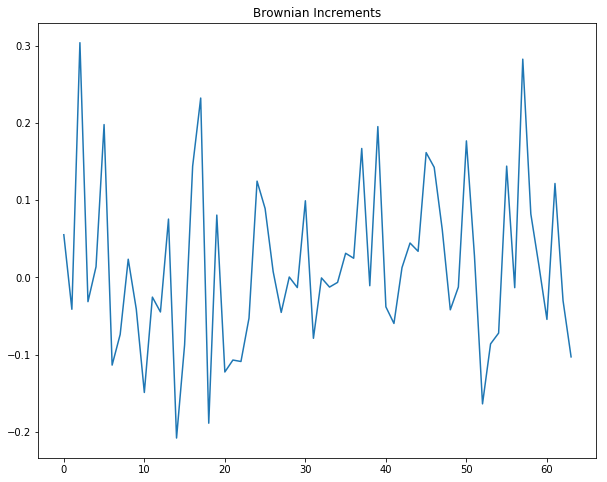

In [2]:
# Brownian increments
plt.figure(figsize = (10, 8))
xb = np.arange(len(b))
plt.plot(xb, b)
plt.title('Brownian Increments')
plt.show()

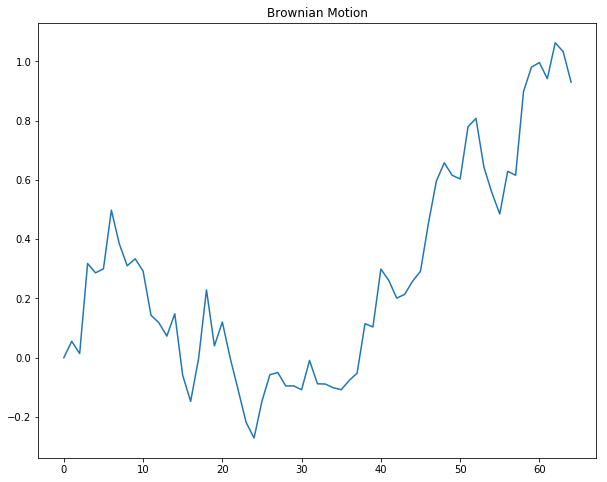

In [3]:
# Brownian motion
plt.figure(figsize = (10, 8))
xw = np.arange(len(W))
plt.plot(xw, W)
plt.title('Brownian Motion')
plt.show()

## GBM in Python

Now that we have a model of the Brownian Motion, we can put the pieces together by modeling the closed-form solution of GBM:

$$S(t) = S_0 e^{(\mu - \frac{1}{2}\sigma^2)t + \sigma W_t}$$

We'll start by making up some arbitrary returns and volatility, then we'll use some actual stock returns to build a real model.

Let's assume that the returns $\mu$ are $0.15$, and the volatility $\sigma$ is $0.4$. We'll start with an initial stock price $S_0$ of $55.25$. Putting all of the pieces together, here's what the code looks like in Python:

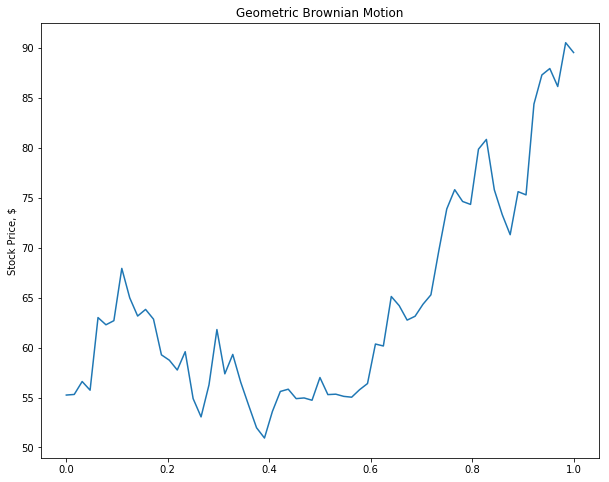

In [4]:
# GBM Exact Solution

# Parameters
#
# So:     initial stock price
# mu:     returns (drift coefficient)
# sigma:  volatility (diffusion coefficient)
# W:      brownian motion
# T:      time period
# N:      number of increments

def GBM(So, mu, sigma, W, T, N):
    t = np.linspace(0., T, N+1)
    S = [So]
    for i in range(1, N+1):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i-1]
        S_temp = So * np.exp(drift + diffusion)
        S.append(S_temp)
    return S, t

So = 55.25
mu = 0.15
sigma = 0.4
T = 1.
N = 2**6
seed = 5
W = Brownian(seed, T, N)[0]

S, t = GBM(So, mu, sigma, W, T, N)

plt.figure(figsize = (10, 8))
plt.plot(t, S)
plt.ylabel('Stock Price, $')
plt.title('Geometric Brownian Motion')
plt.show()

Looking at the plot, this looks like the typical stochastic movement of a stock. We can think about the time on the x-axis as one full trading year, which is about $252$ trading days.

It's important to keep in mind that this is only one potential path. If we change the seed of the random numbers to something else, say $22$, the shape is completely different.

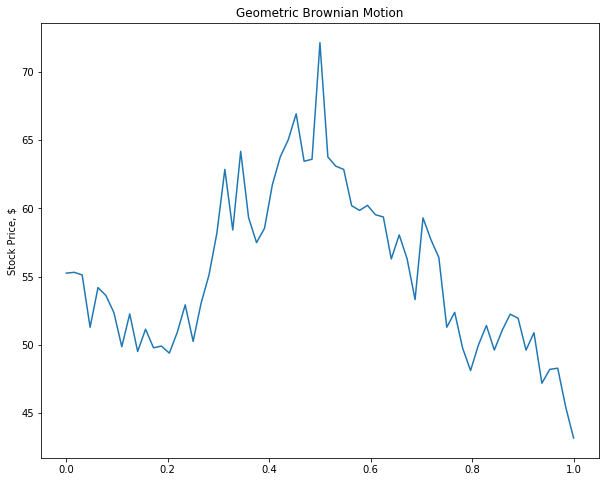

In [5]:
So = 55.25
mu = 0.15
sigma = 0.4
T = 1.
N = 2**6
seed = 22
W = Brownian(seed, T, N)[0]

S, t = GBM(So, mu, sigma, W, T, N)

plt.figure(figsize = (10, 8))
plt.plot(t, S)
plt.ylabel('Stock Price, $')
plt.title('Geometric Brownian Motion')
plt.show()

It's also important to note the limitations of this model. The returns and volatility are kept constant, but in actuality are probably more realistically modeled as stochastic processes.

When you build a model from real world historical data, the time period of those returns will also affect your model, so it's good to investigate different time periods, such as $50$ days or $200$ days, or some other time period.

We also lack any sort of severe "shocks". The diffusion coefficient in our model provides the volatility, but a major news story or event can affect the price movement even more. Adding an even larger movement in the stock price could be a good way to model unforeseen news events that could impact the price dynamics. This might be good if we're performing some type of a stress test.

## GBM in Practice: Example with AMZN

In this example, we're going to use the daily returns of Amazon (AMZN) from 2016 to build a GBM model. We'll look at a number of different models and compare them to the actual price movements to show just how difficult it is to predict the price movements. The final step will be the implementation of the Euler-Maruyama approximation.

### Collecting the Data

To collect the data, we'll use [quandl](https://www.quandl.com/) to collect end of day stock prices from 2016.

In [6]:
import quandl
import numpy as np
import matplotlib.pyplot as plt

start = "2016-01-01"
end   = "2016-12-31"

df = quandl.get("WIKI/AMZN", start_date = start, end_date = end)

print(df.head())

              Open     High     Low   Close     Volume  Ex-Dividend  \
Date                                                                  
2016-01-04  656.29  657.715  627.51  636.99  9314519.0          0.0   
2016-01-05  646.86  646.910  627.65  633.79  5822603.0          0.0   
2016-01-06  622.00  639.790  620.31  632.65  5329197.0          0.0   
2016-01-07  621.80  630.000  605.21  607.94  7074915.0          0.0   
2016-01-08  619.66  624.140  606.00  607.05  5512915.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2016-01-04          1.0     656.29    657.715    627.51      636.99   
2016-01-05          1.0     646.86    646.910    627.65      633.79   
2016-01-06          1.0     622.00    639.790    620.31      632.65   
2016-01-07          1.0     621.80    630.000    605.21      607.94   
2016-01-08          1.0     619.66    624.140    606.00      607.05   

    

After looking at the first few rows of data, we can pull out the end of day close prices for plotting.

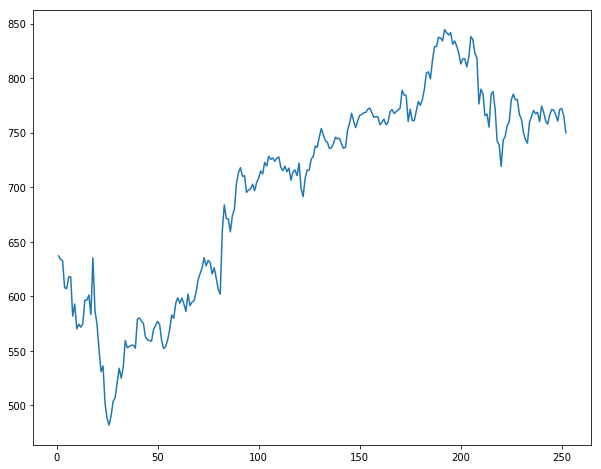

In [7]:
adj_close = df['Adj. Close']
time = np.arange(1, len(adj_close)+1)

plt.figure(figsize = (10, 8))
plt.plot(time, adj_close)
plt.show()

In order to build our GBM model, we'll need the drift and diffusion coefficients. We can compute those from the daily returns using the following function:

In [8]:
def daily_return(adj_close):
    returns = []
    for i in range(len(adj_close)-1):
        today = adj_close[i+1]
        yesterday = adj_close[i]
        daily_return = (today - yesterday) / yesterday
        returns.append(daily_return)
    return returns

returns = daily_return(adj_close)

mu = np.mean(returns) * 252.
sigma = np.std(returns) * np.sqrt(252.)

mu, sigma

(0.20610164414801632, 0.29123424927038993)

The mean of the returns are multiplied by the $252$ trading days so that we can annualize returns. We're going to build a model for a one year time horizon, but we could have easily converted to bi-annual, quarterly or weekly returns. Similarly, the variance is also multiplied by $252$.

### GBM Model

Now that we've computed the drift and diffusion coefficients, we can build a model using the GBM function. Keep in mind that this is an exact solution to the SDE we started with. For this special case, there exists an exact solution, but this won't always be the case

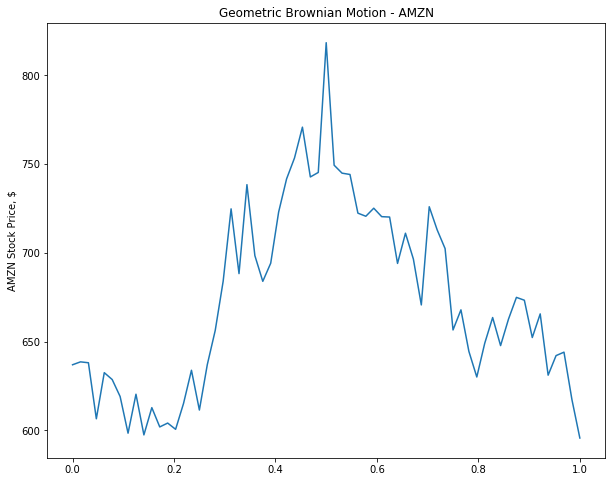

In [9]:
# GBM Exact Solution

# Parameters
#
# So:     initial stock price
# mu:     returns (drift coefficient)
# sigma:  volatility (diffusion coefficient)
# W:      brownian motion
# T:      time period
# N:      number of increments

def GBM(So, mu, sigma, W, T, N):
    t = np.linspace(0., T, N+1)
    S = [So]
    for i in range(1, N+1):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i-1]
        S_temp = So * np.exp(drift + diffusion)
        S.append(S_temp)
    return S, t

So = adj_close[0]
T = 1.
N = 2**6
seed = 22
W = Brownian(seed, T, N)[0]

S, t = GBM(So, mu, sigma, W, T, N)

plt.figure(figsize = (10, 8))
plt.plot(t, S)
plt.ylabel('AMZN Stock Price, $')
plt.title('Geometric Brownian Motion - AMZN')
plt.show()

If we overlay the actual stock prices, we can see how our model compares.

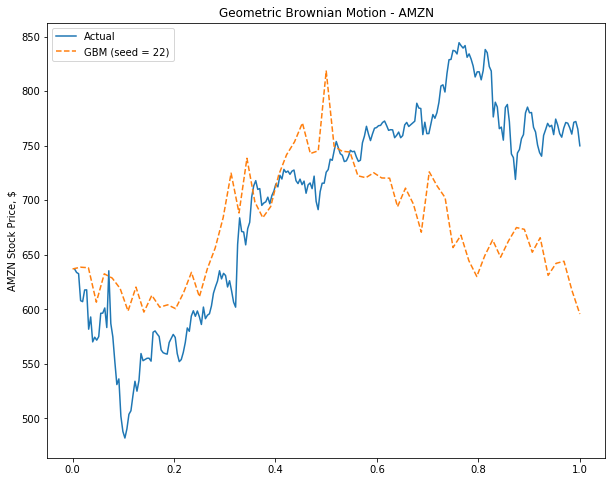

In [10]:
# Adjusting the original time array from days to years
time = np.arange(1, len(adj_close) + 1) / len(adj_close)

plt.figure(figsize = (10, 8))
plt.plot(time, adj_close, label='Actual')
plt.plot(t, S, label = 'GBM (seed = 22)', ls = '--')

plt.ylabel('AMZN Stock Price, $')
plt.title('Geometric Brownian Motion - AMZN')

plt.legend(loc = 'upper left')
plt.show()

We can also plot some other models with different random seeds to see how the path changes.

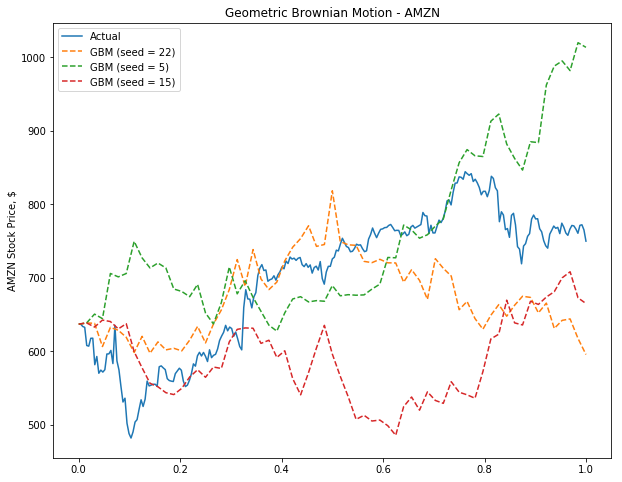

In [11]:
T = 1.
N = 2**6
S0 = adj_close[0]

seed = 5
W = Brownian(seed, T, N)[0]
S2 = GBM(So, mu, sigma, W, T, N)[0]

seed = 15
W = Brownian(seed, T, N)[0]
S3 = GBM(So, mu, sigma, W, T, N)[0]

# Adjusting the original time array from days to years
time = np.arange(1, len(adj_close) + 1) / len(adj_close)

plt.figure(figsize = (10, 8))
plt.plot(time, adj_close, label='Actual')
plt.plot(t, S, label = 'GBM (seed = 22)', ls = '--')
plt.plot(t, S2, label = 'GBM (seed = 5)', ls = '--')
plt.plot(t, S3, label = 'GBM (seed = 15)', ls = '--')

plt.ylabel('AMZN Stock Price, $')
plt.title('Geometric Brownian Motion - AMZN')

plt.legend(loc = 'upper left')
plt.show()

We can see from the plot that depending on our random numbers generated, the path can take on any number of shapes. Testing trading strategies against a large number of these simulations is a good idea because it shows how well our model is able to generalize. If we were to fit a model on any one given path, we would likely overfit our data.

### Euler-Maruyama Model

Now that we have some working GBM models, we can build an Euler-Maruyama Model to approximate the path. In this example, I'm going to use the model with the seed set to $5$.

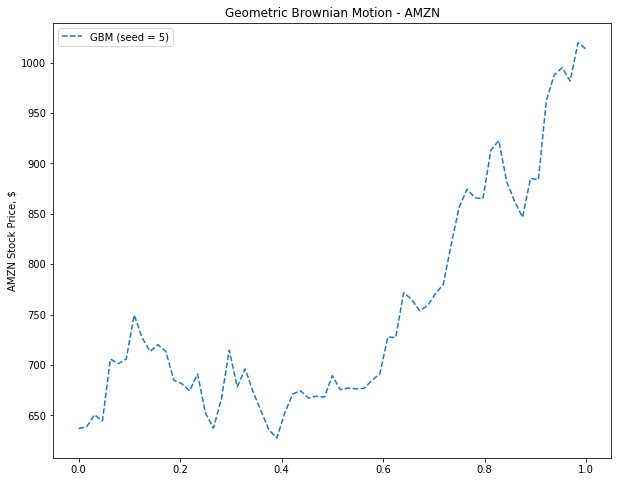

In [12]:
T = 1.
N = 2**6
S0 = adj_close[0]

seed = 5
W = Brownian(seed, T, N)[0]
S2 = GBM(So, mu, sigma, W, T, N)[0]

plt.figure(figsize = (10, 8))
plt.plot(t, S2, label = 'GBM (seed = 5)', ls = '--')

plt.ylabel('AMZN Stock Price, $')
plt.title('Geometric Brownian Motion - AMZN')

plt.legend(loc = 'upper left')
plt.show()

Recall that the Euler-Maruyama Approximation is the following:

$$w_{i+1} = w_i + \mu w_i \Delta t_i + \sigma w_i \Delta W_i$$

where $\mu$ is the annualized expected returns of AMZN, and $\sigma$ is the volatility.

An important piece of the Euler-Maruyama approximation to be aware of is the size of the time step. I'm going to plot a couple of different time steps so that I can see how the models change.

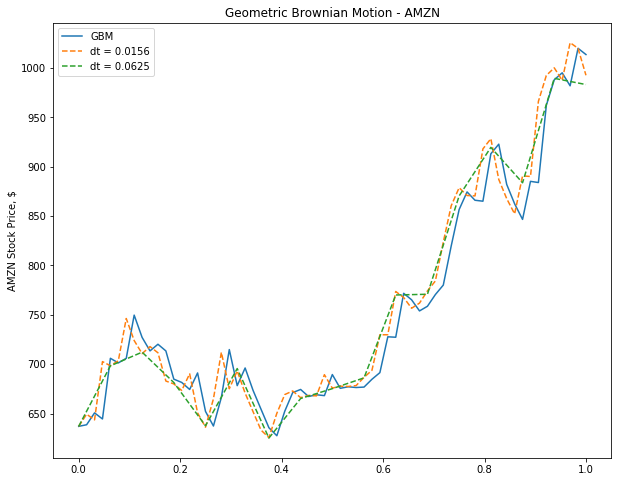

In [13]:
# Euler Maruyama Approximation
def EM(So, mu, sigma, b, T, N, M):
    dt = M * T / N
    L = int(N/M)
    w = [So]
    for i in range(L):
        Winc = np.sum(b[M*i : M*(i+1)])
        w_new = w[i] + mu*w[i]*dt + sigma*w[i]*Winc
        w.append(w_new)
    return w, dt


T = 1.
N = 2**6
So = adj_close[0]
seed = 5
W, b = Brownian(seed, T, N)

# Exact solution
S, t = GBM(So, mu, sigma, W, T, N)

# EM Approximation 1, M = 1, dt = 0.0156
M = 1
L = int(N/M)
EM_approx_1 = EM(So, mu, sigma, b, T, N, M)[0]
time_EM_1 = np.linspace(0., 1., L+1)

# EM Approximation 2, M = 4, dt = 0.0625
M = 4
L = int(N/M)
EM_approx_2 = EM(So, mu, sigma, b, T, N, M)[0]
time_EM_2 = np.linspace(0., 1., L+1)

plt.figure(figsize = (10, 8))
plt.plot(t, S, label = 'GBM')
plt.plot(time_EM_1, EM_approx_1, label = 'dt = 0.0156', ls ='--')
plt.plot(time_EM_2, EM_approx_2, label = 'dt = 0.0625', ls ='--')

plt.ylabel('AMZN Stock Price, $')
plt.title('Geometric Brownian Motion - AMZN')

plt.legend(loc = 'upper left')
plt.show()

As we can see from the results, the smaller time step closely approximates the solution. As the time step increases the model does not track the actual solution as closely. The larger time step still allows the model to follow the overall trend, but does not capture all the details.

Since this is a very small dataset, computational efficiency isn't a concern. As the dataset becomes larger, we may want to speed up computations, so there will ultimately be a tradeoff between time to solve a model and accuracy. Depending on what the goal of our model is, we may or may not need the granularity that a very small time step provides.

## Conclusion

In this articla, I implemented a Geometric Brownian Motion model in Python for a stochastic differential equation commonly used in quantitative finance. Although this model has a solution, many do not. For these models, we have to use numerical methods to find approximtions, such as Euler-Maruyama. Daily returns from AMZN in 2016 were used as a case study to show various GBM and Euler-Maruyama Models.

To sum things up, here's a couple of the key takeaways:
1. A stochastic model can yield any number of different hypothetical paths (predicting stock movement is very difficult).
2. Numerical models can be used to approximate solutions, but there will always be a tradeoff between computational accuracy and efficiency.